In [74]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns

#  Scientific libraries
from numpy import arange,array,ones
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [75]:
def read_file(filename):
    data = pd.read_excel(filename, sheet_name = 'Sheet1')
    return data


#### Question b
i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [114]:
filename = './CCPP/Folds5x2_pp.xlsx'
dataset = read_file(filename)
rows = dataset.shape[0]
columns = dataset.shape[1]
print('rows:', rows)
print('cols:', columns)

rows: 9568
cols: 5


##### --- There are 9668 rows and 5 columns. 
##### --- Columns represent hourly average ambient features: T,AP,RH,V and the prediction of hourly electrical energy: EP
##### --- Rows reprensent the vaules of each features.

#### Question b
ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

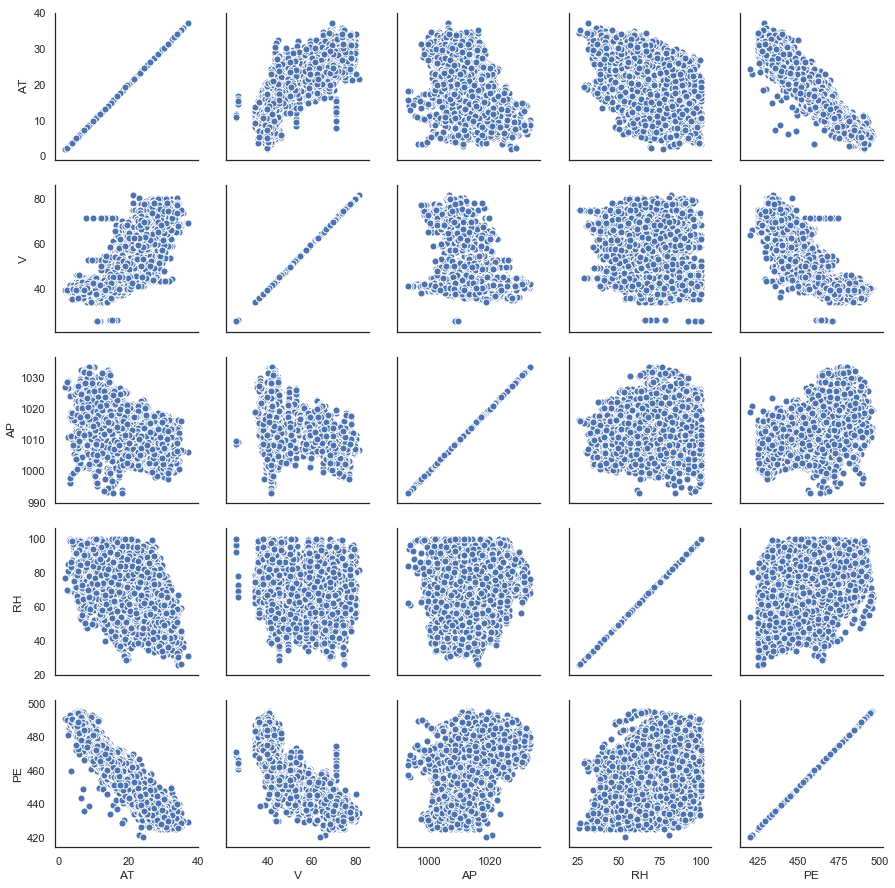

In [125]:
import seaborn as sns
# # create 4 subplot, each plot width=15,height=6
# plt.figure()
# fig = plt.subplots(2,2,figsize=(15,6))
# # change the distance between subplot as a fraction of the average axis width
# plt.subplots_adjust(wspace =0.5, hspace =0.5)
# features = ['AT', 'V', 'AP', 'RH']
# # dependent var
# yData = dataset['PE']
# n = 0
# for f in features:
#     xData = dataset[f]
#     plt.subplot(2,2,n+1)
#     plt.xlabel(f)
#     plt.ylabel('PE')
#     plt.scatter(xData,yData, s = 1)
# #     plt.legend(loc='upper right')
#     n += 1
# # sns.pairplot(dataset, x_vars=features, y_vars = 'PE')
# plt.show()

# features = ['AT', 'V', 'AP', 'RH']
# # dependent var
# yData = dataset['PE']

graph = sns.PairGrid(dataset, palette='GnBu_d')
graph = graph.map(plt.scatter,s=50, edgecolor="white")

#### Question b
iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [78]:
# mean, median, range, first and third quartiles, interquartile ranges
def get_values(dataset):
    dataStat = dataset.describe()
    mean = dataStat['mean']
    median = dataStat['50%']
    colRange = dataStat['max'] - dataStat['min']
    firstQuartile = dataStat['25%']
    thirdQuartile = dataStat['75%']
    interquartileRange = thirdQuartile - firstQuartile
    return [mean, median, colRange, firstQuartile, thirdQuartile, interquartileRange]

valueList = []
ATset = dataset['AT']
ATvalues = get_values(ATset)
valueList.append(ATvalues)

Vset = dataset['V']
Vvalues = get_values(Vset)
valueList.append(Vvalues)

APset = dataset['AP']
APvalues = get_values(APset)
valueList.append(APvalues)

RHset = dataset['RH']
RHvalues = get_values(RHset)
valueList.append(RHvalues)

PEset = dataset['PE']
PEvalues = get_values(PEset)
valueList.append(PEvalues)

# print(valueList)
print(pd.DataFrame(valueList, index = ['AT', 'V', 'AP', 'RH', 'PE'], \
                   columns = ['mean', 'median', 'range', '25%', '75%', 'interquartileRange']))

           mean    median  range        25%      75%  interquartileRange
AT    19.651231    20.345  35.30    13.5100    25.72             12.2100
V     54.305804    52.080  56.20    41.7400    66.54             24.8000
AP  1013.259078  1012.940  40.41  1009.1000  1017.26              8.1600
RH    73.308978    74.975  74.60    63.3275    84.83             21.5025
PE   454.365009   451.550  75.50   439.7500   468.43             28.6800


#### Question (c)
For
Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

Coefficient: [-2.1713199585177945, -1.1681351265557118, 1.4898716733991129, 0.45565010226298014]


<Figure size 432x288 with 0 Axes>

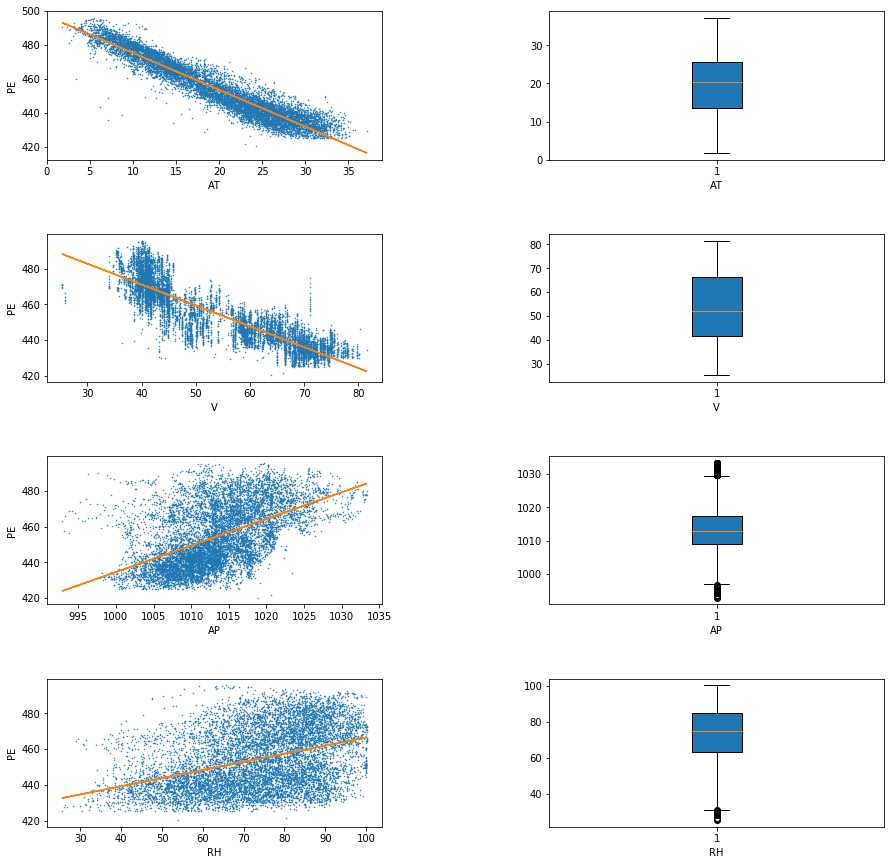

In [79]:
# create 4 subplot, each plot width=15,height=6
plt.figure()
fig = plt.subplots(2,2,figsize=(15,15))

# change the distance between subplot as a fraction of the average axis width
plt.subplots_adjust(wspace =0.5, hspace =0.5)
features = ['AT', 'V', 'AP', 'RH']
# dependent var
yData = dataset['PE']
n = 0
coefficient =[]
for f in features:
    xData = dataset[f]
    n += 1
    plt.subplot(4,2,n)
    plt.xlabel(f)
    plt.ylabel('PE')
    # Generated linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(xData,yData)
    line = slope * xData + intercept
    plt.plot(xData,yData,'.', xData, line, markersize = 1)
    n += 1
    plt.subplot(4,2,n).set_xlabel(f)
    plt.boxplot(xData, patch_artist=True)
    coefficient.append(slope)

print('Coefficient:', coefficient)
plt.show()

##### --- There are some outliers in predictor AP and RH

#### Question (d)
Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [80]:
from sklearn.linear_model import LinearRegression

xData = dataset.loc[:, ['AT', 'V', 'AP', 'RH']]
yData = dataset.loc[:, ['PE']]

# # SKLearn for Linear
# # Split trainset and testset by 0.2 fraction
# # x_train,x_test, y_train, y_test = train_test_split(xData, yData, test_size = 0.2, random_state=100)
linreg = LinearRegression()
# # Fit the linear model
modelLinear = linreg.fit(xData, yData)
# New coef in multiple model
newCoefficient = modelLinear.coef_[0]
print(newCoefficient)

# Stats Model
xData = sm.add_constant(xData)
# Oridinary Learst Squares
model = sm.OLS(yData, xData).fit()
# Statsmodels
print(model.summary())
print(model.pvalues)


[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:36:41   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


##### --- Accoring to R-squared = 0.929 and P-value is smaller than 0.05, which means these predictors are significant to response, We can reject the null hypothsis


#### Question (e)
How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

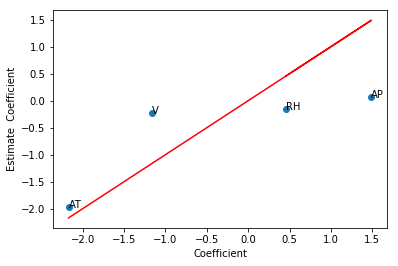

In [81]:
# Draw a coeficient plot
plt.xlabel('Coefficient')
plt.ylabel('Estimate  Coefficient')
# plt.lineplot(line)
plt.scatter(coefficient,newCoefficient)
# Draw line: y = x
plt.plot(coefficient, coefficient, 'r')
plt.annotate(s='AT', xy=(coefficient[0], newCoefficient[0]))
plt.annotate(s='V', xy=(coefficient[1], newCoefficient[1]))
plt.annotate(s='AP', xy=(coefficient[2], newCoefficient[2]))
plt.annotate(s='RH', xy=(coefficient[3], newCoefficient[3]))
plt.show()

#### Question (f)
Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form1
Y =β0 +β1X+β2X2 +β3X3 +ε

In [112]:
from sklearn.preprocessing import PolynomialFeatures

xData = dataset.loc[:, ['AT', 'V', 'AP', 'RH']]
yData = dataset.loc[:, ['PE']]

# ## create 4 subplot, each plot width=15,height=6
# plt.figure()
# fig = plt.subplots(2,2,figsize=(15,6))
# # change the distance between subplot as a fraction of the average axis width
# plt.subplots_adjust(wspace =0.5, hspace =0.5)
# features = ['AT', 'V', 'AP', 'RH']
# # dependent var
# yData = dataset['PE']
# n = 0

# for f in features:
#     xData = dataset[f]
#     plt.subplot(2,2,n+1)
#     plt.xlabel(f)
#     plt.ylabel('PE')
    
#     # Builing the 3 degree model
#     z = np.polyfit(xData, yData, 3)
#     # Flat from 2d to 1d
#     z = z.flatten()
#     # Get the model
#     model = np.poly1d(z)
#     # Print the parameter of model
#     print(model)
#     # Predict the response
#     yPredict = np.polyval(model, xData)
#     # Draw predictive response and true response
#     plt.plot(xData, yPredict, color = 'red')
#     plt.scatter(xData, yData, s = 1)
#     n += 1
# plt.show()

features = ['AT', 'V', 'AP', 'RH']
for f in features:
    xData = dataset[f].values.reshape(-1,1)
    poly = PolynomialFeatures(degree = 3)
    xDataTrans = poly.fit_transform(xData)
    sm.add_constant(xDataTrans)
    trainedModel = sm.OLS(yData, xDataTrans).fit()
    print('Predictor:', f)
#     print(trainedModel.summary(xname=['Bias', f+'1', f+'2', f+'3']))
    print('R-squared: ', trainedModel.rsquared)
    print(trainedModel.pvalues, '\n')

Predictor: AT
R-squared:  0.9118826627742724
const     0.000000e+00
x1        7.898147e-07
x2        8.833045e-73
x3       3.652185e-110
dtype: float64 

Predictor: V
R-squared:  0.7750219775589422
const    0.000000
x1       0.000025
x2       0.768497
x3       0.013735
dtype: float64 

Predictor: AP
R-squared:  0.2748633041651872
const    4.502734e-17
x1       4.502735e-17
x2       3.666705e-17
x3       8.264146e-18
dtype: float64 

Predictor: RH
R-squared:  0.15374253544345973
const    0.000000
x1       0.000377
x2       0.000009
x3       0.000014
dtype: float64 



##### --- According R-squared, like predictor AP,RH, their r-squared are too small whci mean there are nonlinear association with response.

#### Question (g) 
Is there evidence of association of interactions of predictors with the response? 
To answer this question, run a full linear regression model with all pairwise interaction terms 
and state whether any interaction terms are statistically significant.

In [83]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

xData = dataset.loc[:, ['AT', 'V', 'AP', 'RH']]
yData = dataset.loc[:, ['PE']]
# xData = xData[0:1]
# yData = yData[0:1]

# Build a full linear regression model with interaction
# Y = bias + b0x1 + b1x2 + b2x3 + b3x4 + b5x1x2 + b6x1x3 + b7x1x4 + b8x2x3 + b9x2x4 + b10x3x4
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = True)
xDataTrans = poly.fit_transform(xData)
# print(xDataTrans)
# Add const number at the end of formula
sm.add_constant(xDataTrans)
OLSmodels = sm.OLS(yData, xDataTrans)
# print(OLSmodels)
OLSresults = OLSmodels.fit()
print(OLSresults.summary())
print(OLSresults.pvalues)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:36:41   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

##### --- When p values < 0.05, which means this interaction term is significant. Thus some of interactions are not significant.

#### Question (h)
Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? 
Train the regression model on a randomly selected 70% subset of the data with all predictors. 
Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, 
and remove insignificant variables using p-values (be careful about interaction terms). 
Test both models on the remaining points and report your train and test MSEs.

In [84]:
from sklearn.metrics import mean_squared_error
xData = dataset.loc[:, ['AT', 'V', 'AP', 'RH']]
yData = dataset.loc[:, ['PE']]
# xData = xData[0:1]
# yData = yData[0:1]
# Spilt 70% traindata and 30% testdata
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.3)

In [88]:
# Trainset predict
xTrain = sm.add_constant(xTrain)
# Oridinary Learst Squares
model = sm.OLS(yTrain, xTrain).fit()

trainPredict = model.predict(xTrain)
trainMSE = mean_squared_error(yTrain, trainPredict)
print('The train MES:', trainMSE)

# Testset predict
xTest = sm.add_constant(xTest)
# Oridinary Learst Squares
testPredict = model.predict(xTest)
testMSE = mean_squared_error(yTest, testPredict)
print('The test MES:', testMSE)

The train MES: 20.461055950046415
The test MES: 21.502336905442984


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [101]:
# Using possible interaction terms to build model
import statsmodels.formula.api as smf
formula = 'PE ~ AT + V + AP + RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2) + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH'
# formula = 'PE ~ AT + V + AP + RH + AT**2 + V**2 + AP**2 + I(RH**2 + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH'

regression = smf.ols(formula = formula, data = pd.concat([xTrain, pd.DataFrame(yTrain)],axis = 1))
model = regression.fit()
# model.get_feature_names()
trainPredict = model.predict(sm.add_constant(xTrain))
testPredict = model.predict(sm.add_constant(xTest))
trainMSE = mean_squared_error(yTrain, trainPredict)
testMSE = mean_squared_error(yTest, testPredict)
print("The train MSE: {}".format(trainMSE))
print("The test MSE: {}".format(testMSE))
# print(model.summary())
print(model.pvalues)


# # When the value of P>|t| < 0.05, means this interaction is significant to response
# print('Parameter:', OLSresults.params, 'P value:', OLSresults.pvalues)
# print('Parameter:', OLSresults.endog_names)
# for v,p in zip(trainedModel.params, trainedModel.pvalues):
#     if p < 5e-2:
#         print(v)
# Keep interaction term whose p-values < 0.05

# listMatrix = []
# for i in range(len(OLSresults.pvalues)):
#     if OLSresults.pvalues[i] < 5e-2:
#         listMatrix.append(OLSresults.params[i])
#         print('x:', i, ' coefficient:', OLSresults.params[i])
#     else:
#         listMatrix.append(0)
# print(listMatrix)

The train MSE: 17.718256899446327
The test MSE: 19.048055340913116
Intercept     1.728954e-08
AT            2.022507e-01
V             8.759776e-02
AP            1.935937e-09
RH            1.156696e-05
I(AT ** 2)    2.083030e-08
I(V ** 2)     7.999054e-01
I(AP ** 2)    1.841887e-09
I(RH ** 2)    1.627393e-10
AT:V          1.758938e-02
AT:AP         5.625949e-01
AT:RH         2.124381e-03
V:AP          1.384086e-01
V:RH          9.119288e-01
AP:RH         2.605060e-05
dtype: float64


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [104]:
# Remove insignificant interactions, when p-value > 0.05
        
newFormula = 'PE ~ AT + V + AP + RH + I(AT**2) + I(AP**2) + I(RH**2) + AT:V + AT:RH + AP:RH'
regression = smf.ols(formula = newFormula, data = pd.concat([xTrain, pd.DataFrame(yTrain)],axis = 1))
model = regression.fit()
# model.get_feature_names()
trainPredict = model.predict(sm.add_constant(xTrain))
testPredict = model.predict(sm.add_constant(xTest))
trainMSE = mean_squared_error(yTrain, trainPredict)
testMSE = mean_squared_error(yTest, testPredict)
print("After removing unsignificant terms, the train MSE: {}".format(trainMSE))
print("After removing unsignificant terms, the test MSE: {}".format(testMSE))
# print(model.summary())
# print(model.pvalues)

After removing unsignificant terms, the train MSE: 17.74502128105269
After removing unsignificant terms, the test MSE: 19.100151835571157


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
#### Imporving model by removing terms whose p-values > 0.05

#### Question(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

best train K is 1 , smallest train MSE is:  0.0
best test K is 5 , smallest test MSE is:  16.478002311389755


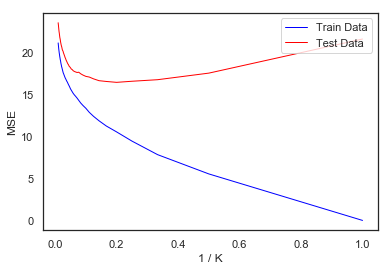

In [131]:
from sklearn import neighbors

def draw_mse(xTrain, xTest, yTrain, yTest):
    
    kSet = range(1,101,1)
    # Testset result
    
    dfTrain = pd.DataFrame({'1/k':[], 'MSE':[]})
    dfTest = pd.DataFrame({'1/k':[], 'MSE':[]})
    
    bestTrainK = 1
    bestTrainMSE = len(xTrain)
    bestTestK = 1
    bestTestMSE = len(xTest)
    for k in kSet:
        # Train set
        model = neighbors.KNeighborsRegressor(n_neighbors=k)
        model.fit(xTrain, yTrain)
        trainPredict = model.predict(xTrain)
        trainMSE = mean_squared_error(yTrain, trainPredict)    
        # ??? df.append() doesnot work
        dfTrain = dfTrain.append({'1/k':k, 'MSE':trainMSE}, ignore_index=True)
        # Get best result of train set
        if trainMSE <= bestTrainMSE:
            bestTrainMSE = trainMSE
            bestTrainK = k
        
        # Test set
        testPredict = model.predict(xTest)
        testMSE = mean_squared_error(yTest, testPredict)
        # ??? df.append() doesnot work
        dfTest = dfTest.append({'1/k':k, 'MSE':testMSE}, ignore_index=True)
        # Get best result of test set
        if testMSE <= bestTestMSE:
            bestTestMSE = testMSE
            bestTestK = k
        
    dfTrain['1/k'] = 1/dfTrain['1/k']
    dfTest['1/k'] = 1/dfTest['1/k']
    
    print('best train K is', bestTrainK, ', smallest train MSE is: ', bestTrainMSE)
    print('best test K is', bestTestK, ', smallest test MSE is: ', bestTestMSE)
    
    # draw plot
    ax = plt.gca()
    ax.set_xlabel('1 / K')
    ax.set_ylabel('MSE')
    # ax.plot(dfTrain, label = '$Train Data$', color='blue', linewidth=1) This doesnot work
    ax.plot(dfTrain['1/k'], dfTrain['MSE'], label = 'Train Data', color='blue', linewidth=1)
    ax.plot(dfTest['1/k'], dfTest['MSE'], label = 'Test Data', color='red', linewidth=1)
    plt.legend(loc='upper right')
    

xData = dataset.loc[:, ['AT', 'V', 'AP', 'RH']]
yData = dataset.loc[:, ['PE']]
# Spilt 70% traindata and 30% testdata
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.3)
# Raw features
xTrain = xTrain.values
yTrain = yTrain.values
xTest = xTest.values
yTest = yTest.values

draw_mse(xTrain, xTest, yTrain, yTest)
# print(xTrain)
# print(yTrain)


best train K is 1 , smallest train MSE is:  0.0
best test K is 5 , smallest test MSE is:  14.629456136537794


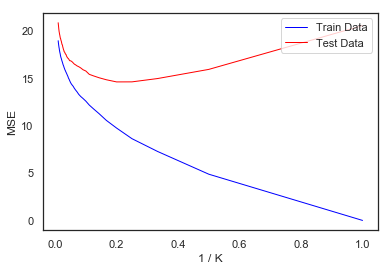

In [132]:
from sklearn import preprocessing

xTrainNormalization = preprocessing.scale(xTrain)
xTestNormalization = preprocessing.scale(xTest)
# print(xTrainNormalization)

draw_mse(xTrainNormalization, xTestNormalization, yTrain, yTest)

#### Question (j) 
Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.


##### --- KNN Regression by using normalized features has the smllest test error: 12.645

### ISLR 2.4.1

##### (a) Better. When sample size is large, it reduces the risk of overfitting of flexible model.
##### (b) Worse. When using flexible model, the risk of overfitting is hight. It is easy to fit the noise. Thus the inflexible model is better.
##### (c) Beter. Flexible model fit better. Inflexible model have trouble finding relationship in non-linear data.
##### (d) Worse. If Var(ε) is too high, flexible model fits the nose easily.

### ISLR 2.4.7

#### (1) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0. 

 
$ ED_1 = \sqrt { (3)^2 }\, = 3$  
$ ED_2 = \sqrt { (2)^2 }\, = 2$    
$ ED_3 = \sqrt { (1)^2 + (3)^2 }\, = 3.16$    
$ ED_4 = \sqrt { (1)^2 + (2)^2 }\, = 2.23$    
$ ED_5 = \sqrt { (-1)^2 + (1)^2 }\, = 1.41$    
$ ED_6 = \sqrt { (1)^2 + (1)^2 + (1)^2 }\, = 1.73$

#### (b) What is our prediction with K = 1? Why?


##### The ED of (0,0,0) is 0, when K=1, the nearest point is Obs5, which is green. So the prediction is Green.

#### (c) What is our prediction with K = 3? Why?

The ED of (0,0,0)is 0, when K=3, the nearest three points are Obs2, Obs5, Obs6. And Obs2 and Obs6 are Red, Obs5 is Green. So the prediction with K=3 is Red.

#### (d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

#####  Thus the best value for K must be small. 
##### Because if boundary is non-linear, the model needs to fit the data better, which requires small K so that it could get better result.